## Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ 
1)As a business manager, try to find out the weak areas where you can 
work to make more profit. 
2)What all business problems you can derive by exploring the data? 
3)You can choose any of the tool of your choice .

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from pandas .plotting import scatter_matrix
import warnings
import seaborn as sns
import os

print('libraries imported successfully')

libraries imported successfully


## Reading dataset

In [2]:
data= pd.read_csv('C:\\Users\Lenovo\Documents\data\spark foundation\\SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Pre-processing of data Exploratory Data Analysis

In [3]:
data.shape

(9994, 13)

In [4]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## Types of Category

In [5]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

## Types of Sub Category

In [6]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

## Types in Segments

In [7]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

## dropping of postal code columns

In [8]:
data=data.drop(columns=['Postal Code'],axis=1)

In [9]:
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## number of products in each category

In [10]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

## Total numbers of products in all category

In [11]:
data['Sub-Category'].value_counts().sum()

9994

## Numbers of products in each sub_category

In [12]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

## Types of regions

In [13]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

## Types of shipmodes

In [14]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

## Types of states

In [84]:
data['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [16]:
data['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

 ## Number of unique values in each column

In [17]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Full summary of data

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


## Satatastical summary of data

In [19]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [20]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Data types

In [85]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

## Visualization of missing values

<AxesSubplot:>

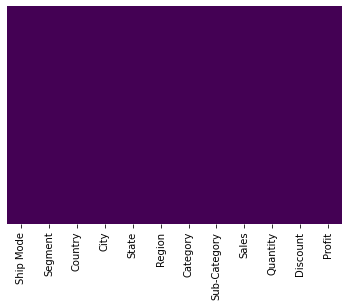

In [22]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Duplicates values

In [23]:
data.duplicated().sum()

50

## Dropping of duplicates values

In [24]:
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## correlation among the columns

In [25]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


## data slicing

In [26]:
data.iloc[0]

Ship Mode        Second Class
Segment              Consumer
Country         United States
City                Henderson
State                Kentucky
Region                  South
Category            Furniture
Sub-Category        Bookcases
Sales                  261.96
Quantity                    2
Discount                  0.0
Profit                41.9136
Name: 0, dtype: object

In [27]:
data.iloc[:,0]

0         Second Class
1         Second Class
2         Second Class
3       Standard Class
4       Standard Class
             ...      
9989      Second Class
9990    Standard Class
9991    Standard Class
9992    Standard Class
9993      Second Class
Name: Ship Mode, Length: 9994, dtype: object

## visuallization of data

### bar plot between sub-category VS category

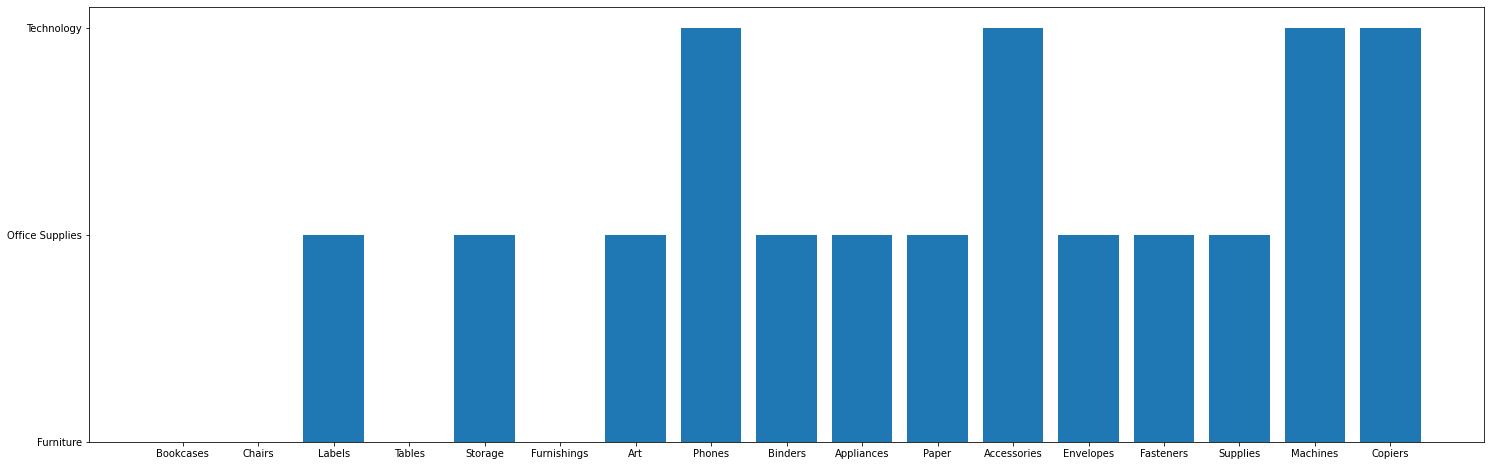

In [28]:
plt.figure(figsize=(25,8))
plt.bar('Sub-Category','Category',data=data)
plt.show()

In [29]:
# in furniture category the frequency of individual item is very less
# in office supplies the frequency of individual item is medium
# in technology the frequency of individuals items  is high

## pie plot of sub-category

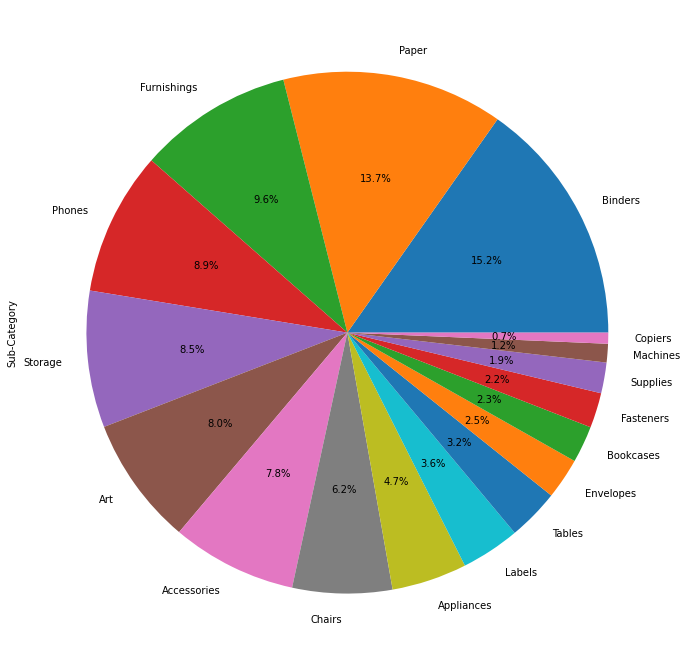

In [31]:
plt.figure(figsize=(16,12))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [33]:
#the store has wide variety of office supplies especially in Binders and department

## bar plot of sales vs profit

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4588\1249658337.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()


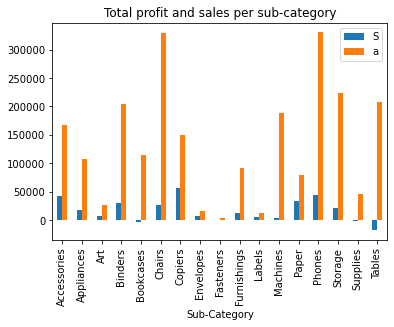

In [35]:
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total profit and sales per sub-category')
plt.legend('Profit')
plt.legend('Sales')
plt.rcParams['figure.figsize']=[10,0]

plt.show()

In [36]:
# highest profit is earned in coplers while selling price for chaires and phones is extremly high compared to other product
# another interesting fact people dont prefer to buy tables and bookcases from superstore hence these department are in loss

## count plot of cities

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

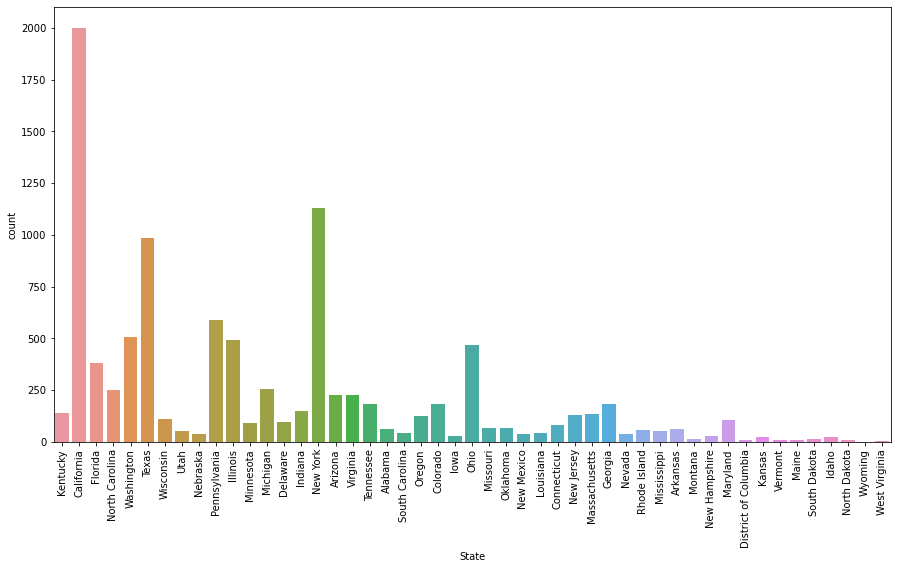

In [37]:
print(data['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.show()

## sales and profit region wise

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4588\3340066824.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()


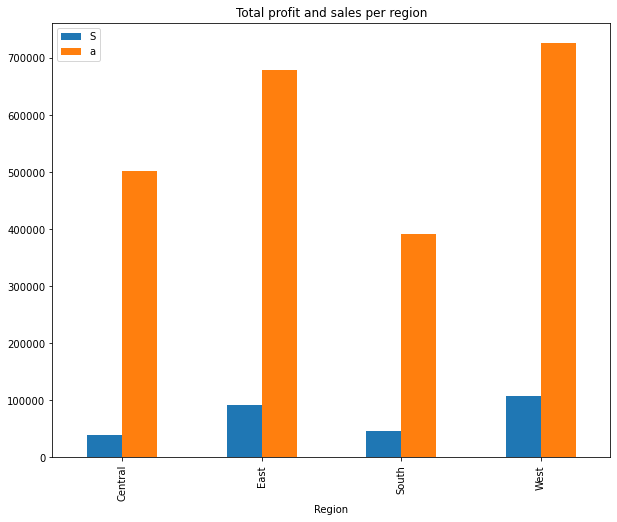

In [40]:
data.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total profit and sales per region')
plt.legend('Profit')
plt.legend('Sales')
plt.rcParams['figure.figsize']=[25,18]
plt.show()



## count plot of sub categories

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


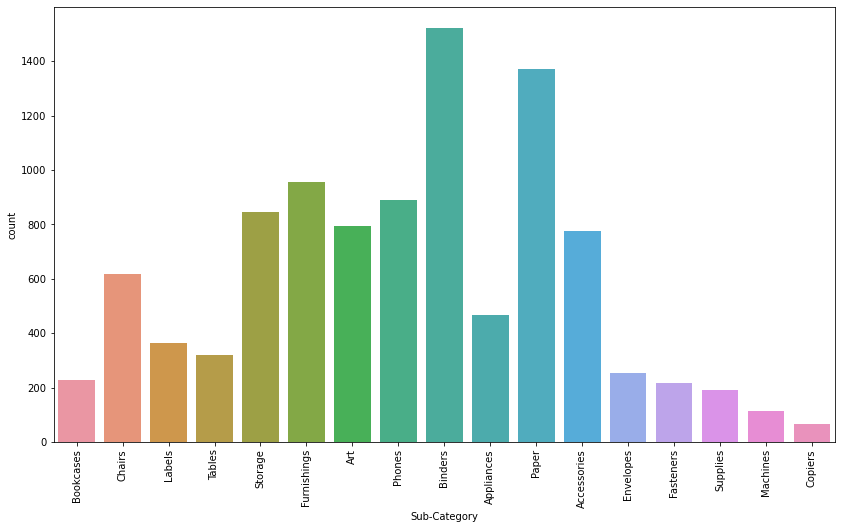

In [42]:
print(data['Sub-Category'].value_counts())
plt.figure(figsize=(14,8))
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

## heatmaps correlation among the columns

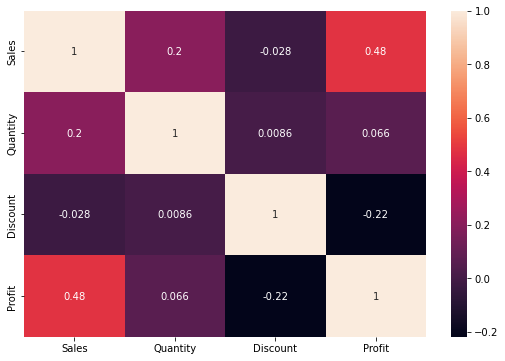

In [45]:
fig,axes= plt.subplots(1,1,figsize=(9,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='Segment', ylabel='count'>

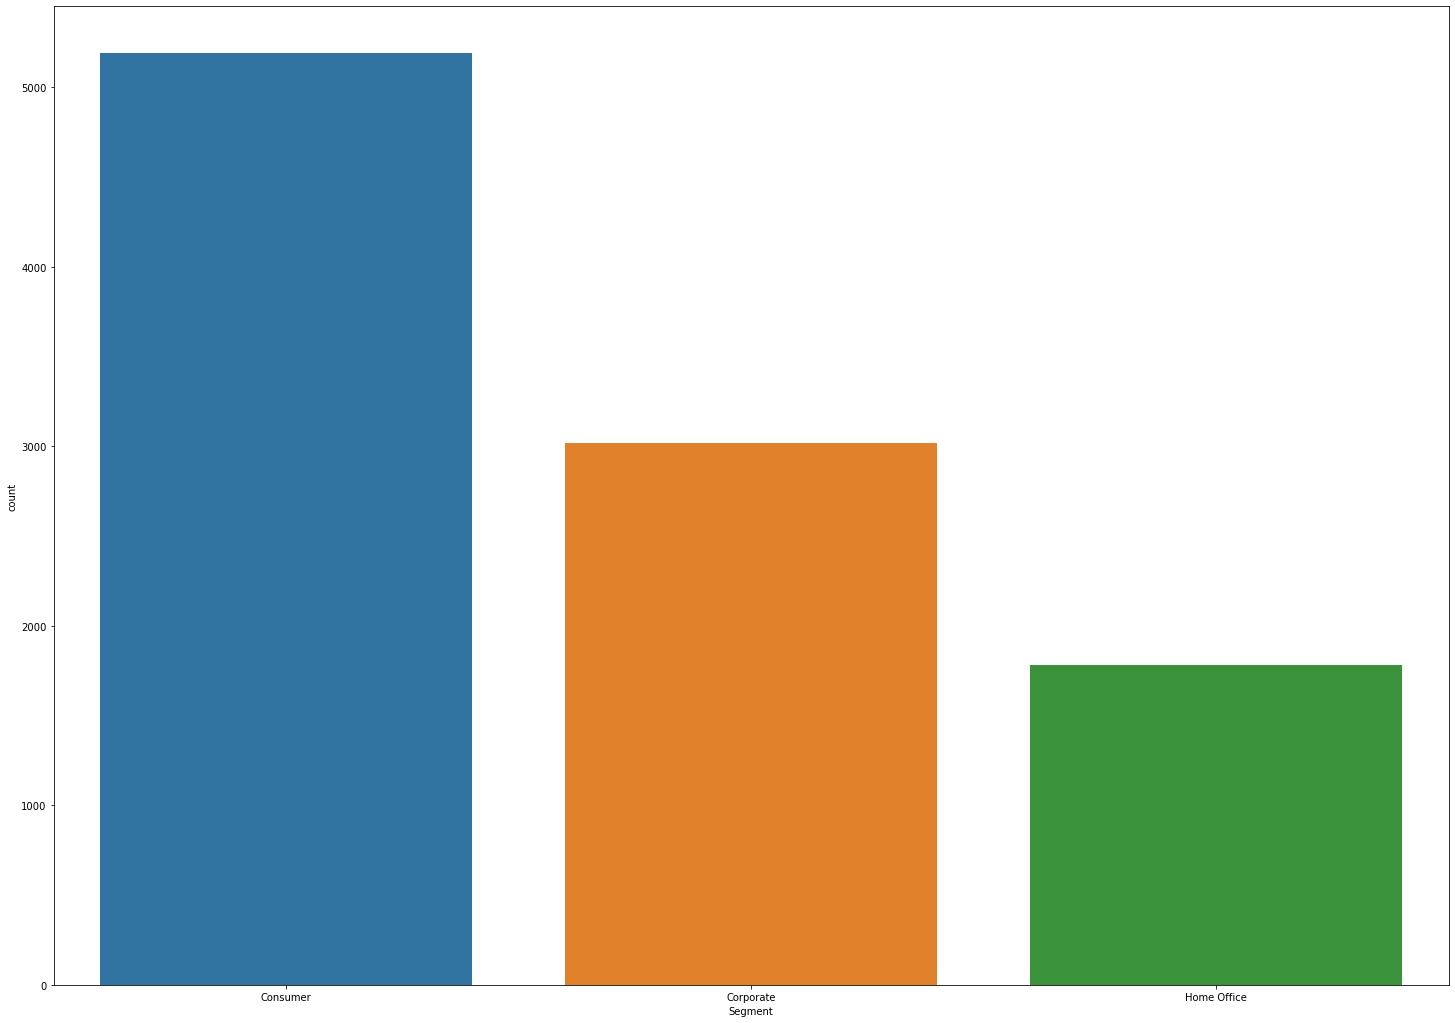

In [50]:
sns.countplot(x=data['Segment'])


<AxesSubplot:xlabel='Region', ylabel='count'>

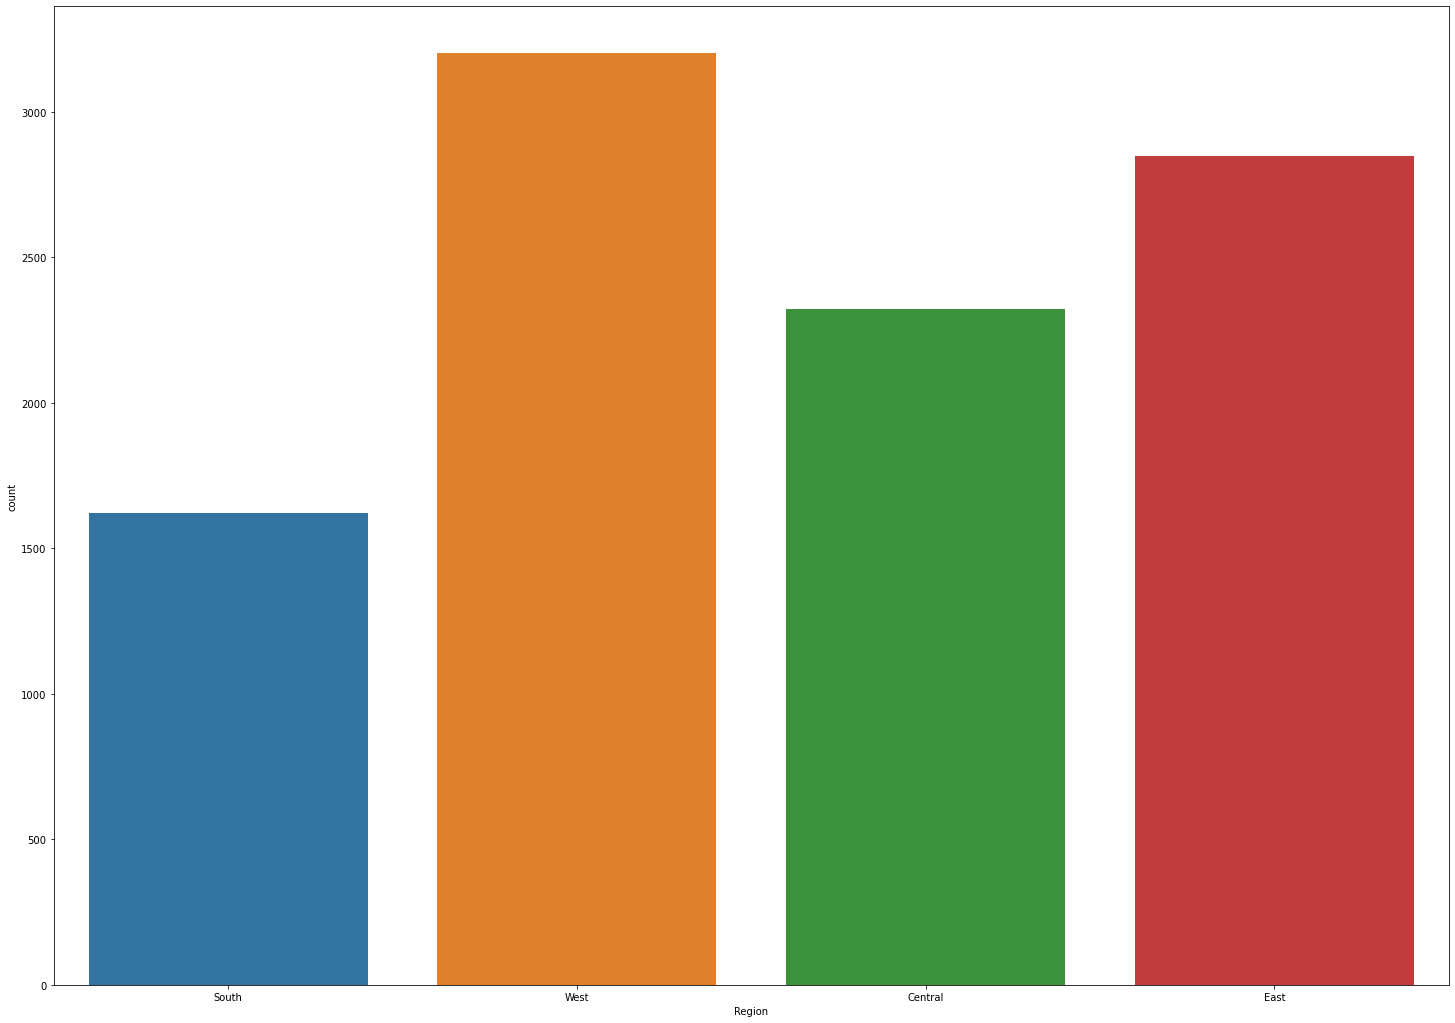

In [51]:
sns.countplot(x=data['Region'])

## bar sub category vs profit

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

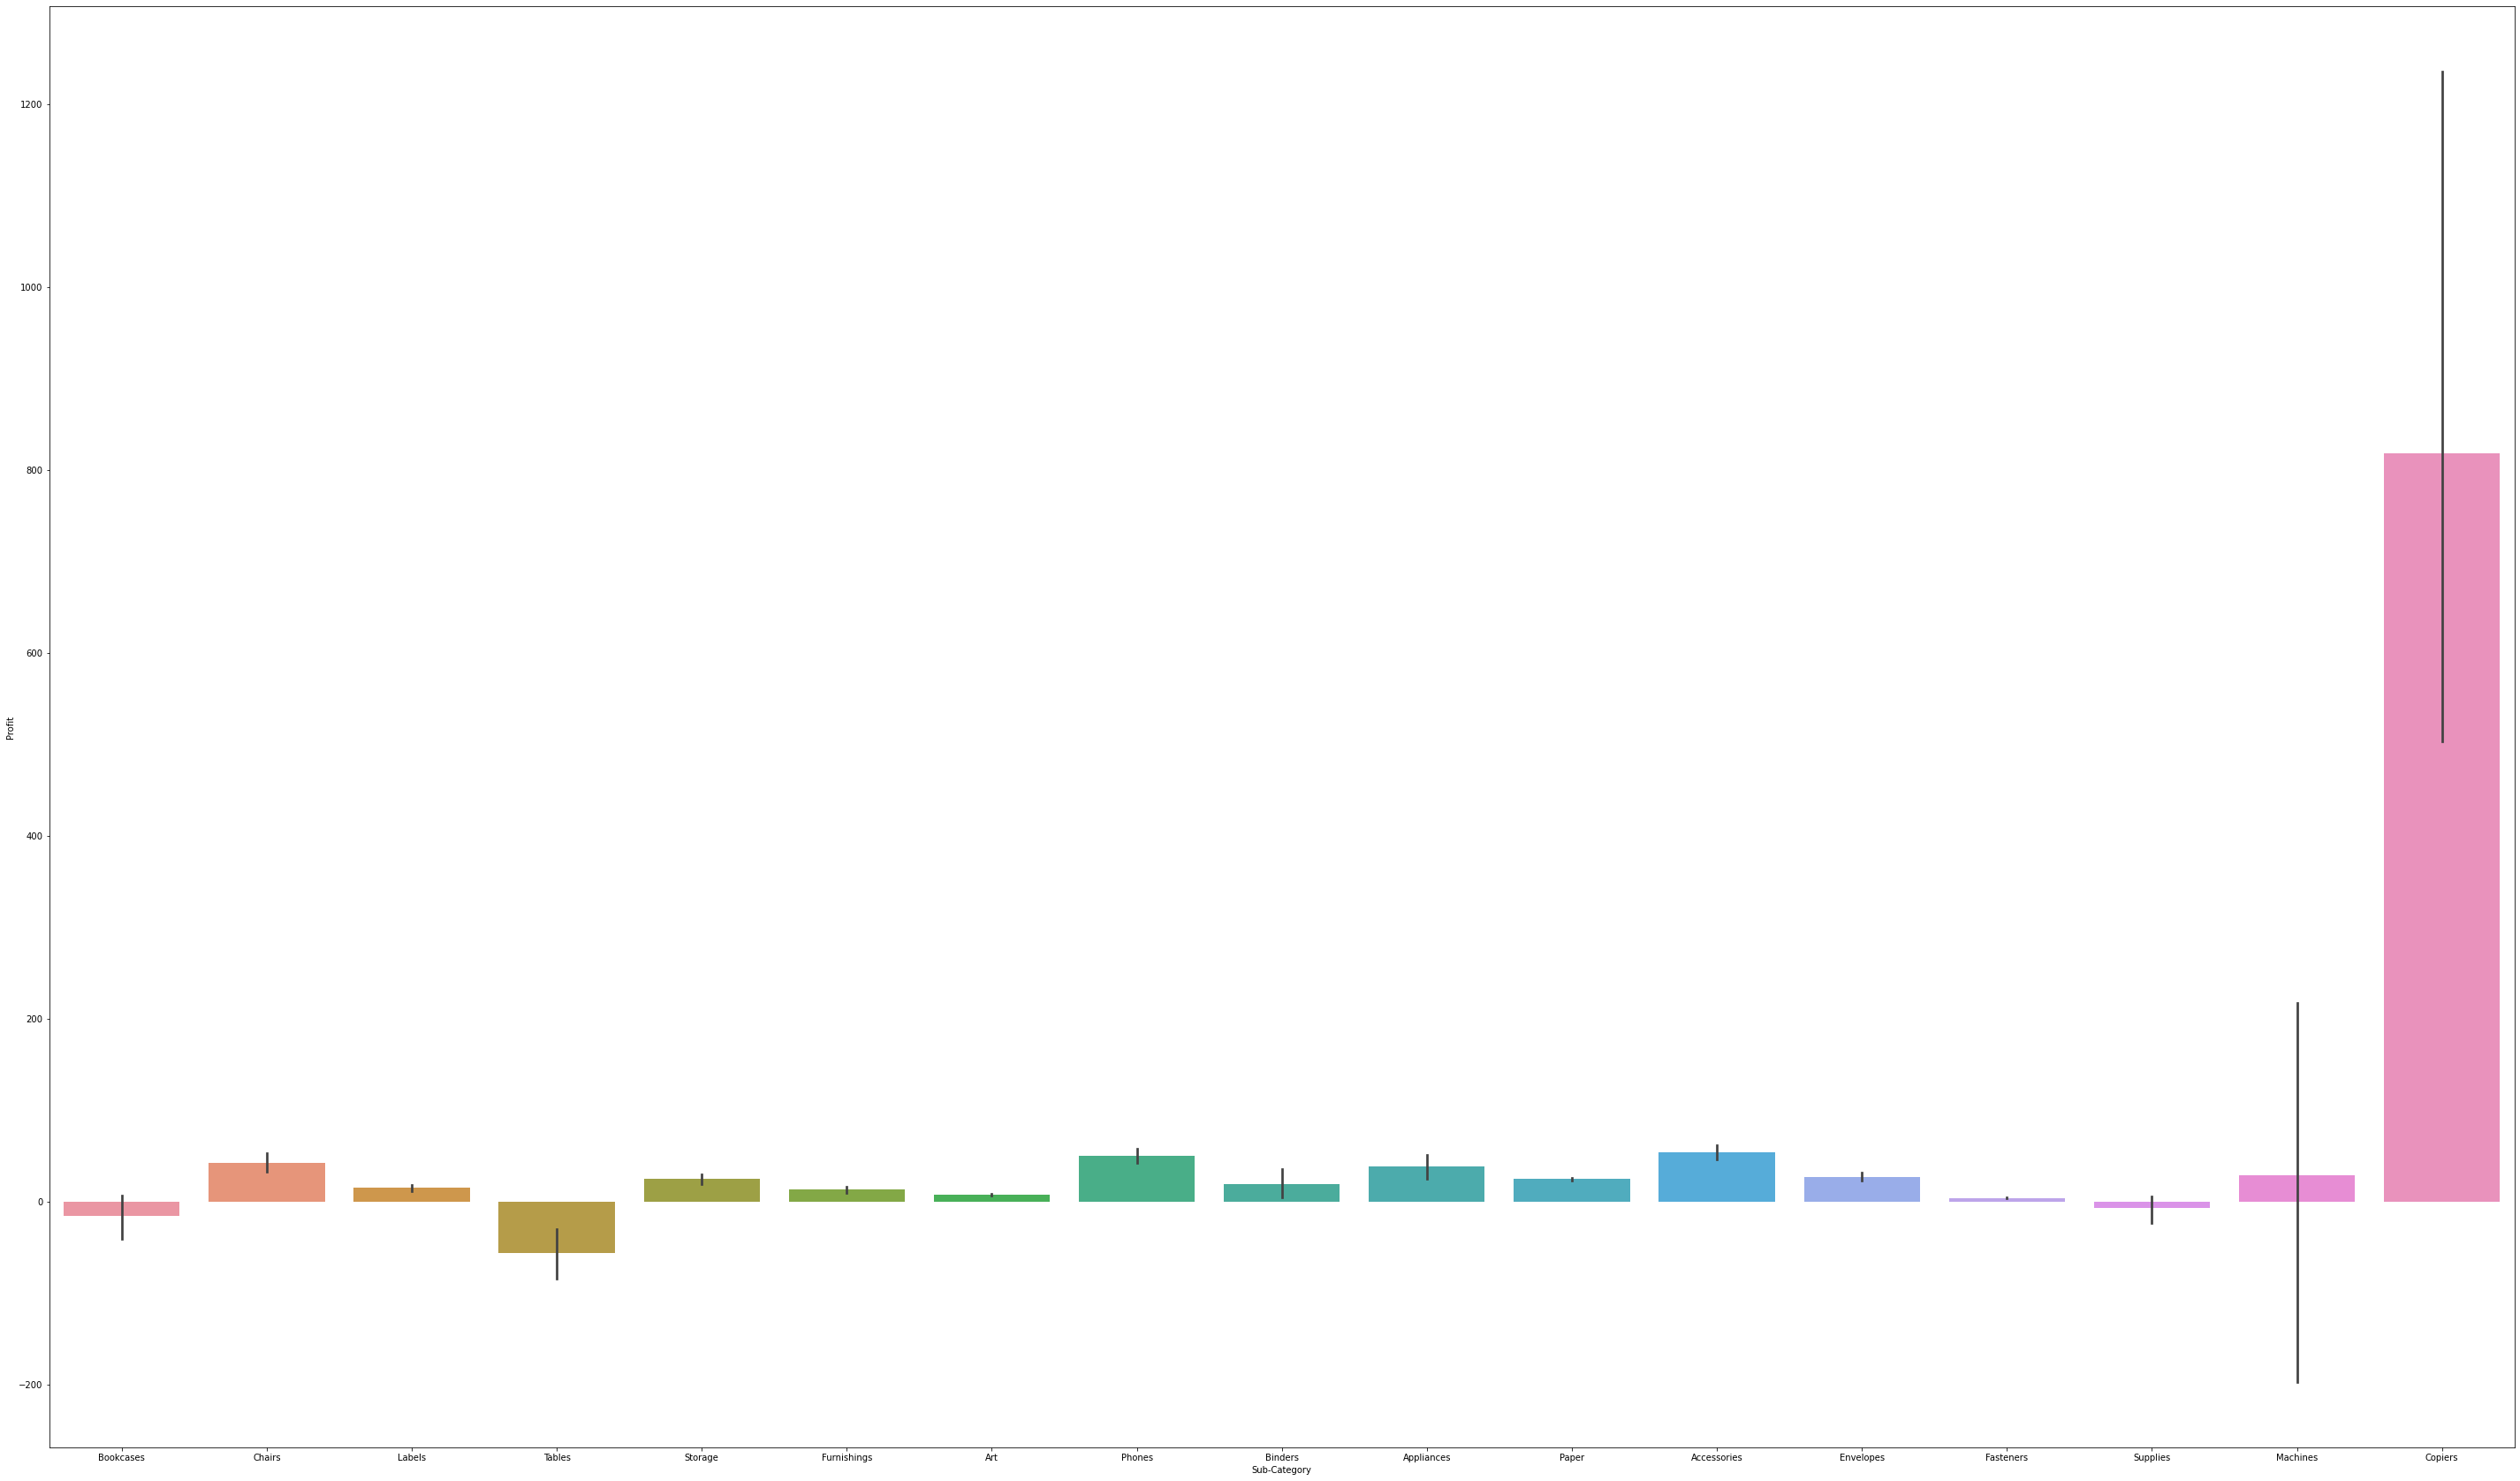

In [57]:
plt.figure(figsize=(50,30))
sns.barplot(x=data['Sub-Category'],y=data['Profit'])

## lineplot of discount vs profit

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


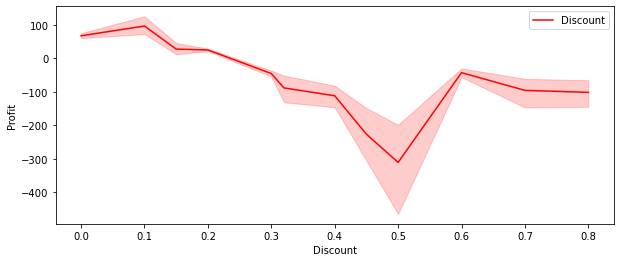

In [58]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit',data=data,color='r',label='Discount')
plt.legend()

## pair plot of sub_category

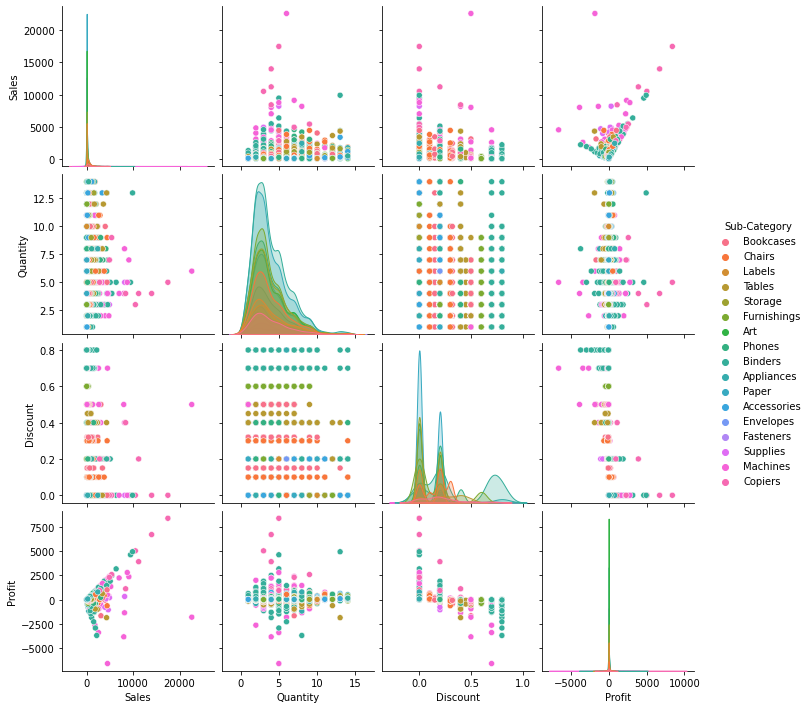

In [59]:
figsize=(15,10)
sns.pairplot(data,hue="Sub-Category")

## pair plot of data

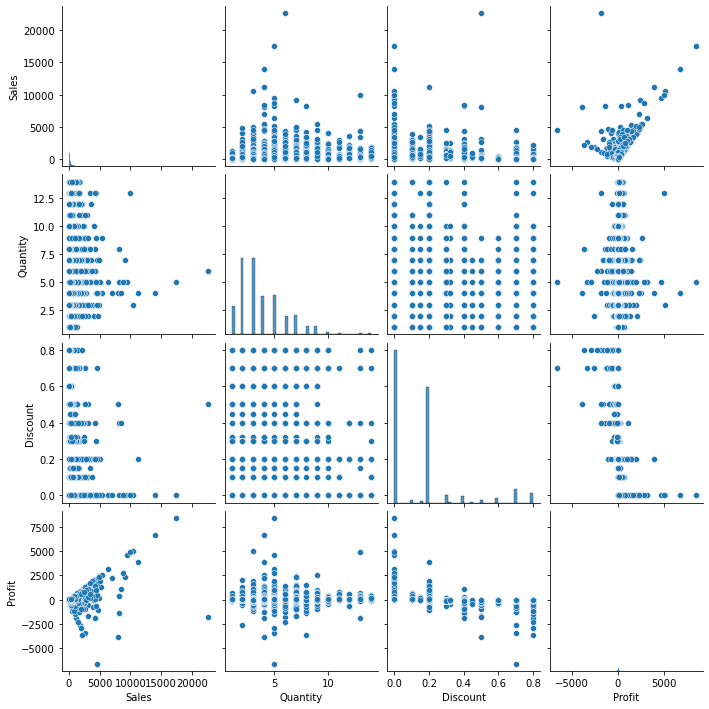

In [60]:
sns.pairplot(data)

## sales statasticals data

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


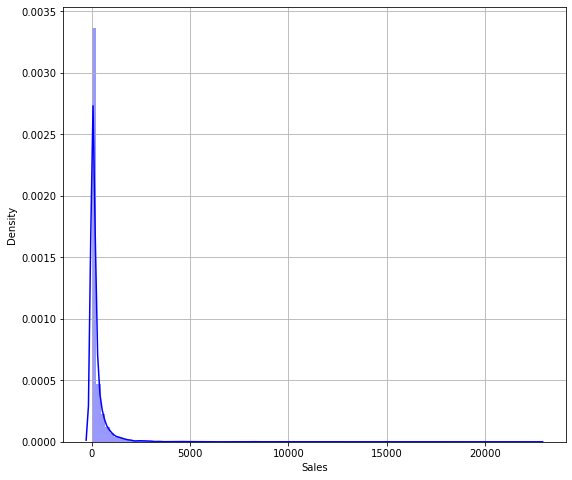

In [64]:
print(data['Sales'].describe())
plt.figure(figsize=(9,8))
plt.grid()
sns.distplot(data['Sales'],color='b',bins=100,hist_kws={'alpha':0.4});

## clustering data

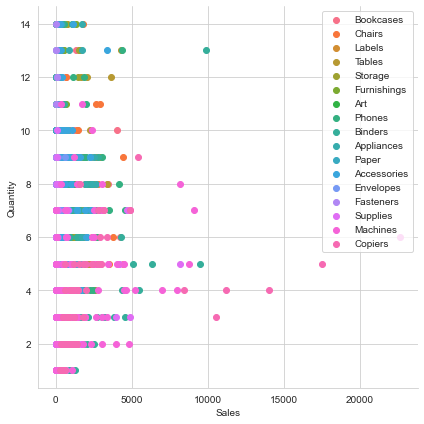

In [83]:
x= data.iloc[:,[9,10,11,]].values
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',
                 max_iter=300,n_init=10,random_state=0).fit(x)
    wcss.append(kmeans.inertia_)
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="Sub-Category",height=6).map(plt.scatter,'Sales','Quantity')

plt.rcParams['figure.figsize']=[10,8]
plt.legend()

## Conclusion

In [ ]:
# profit in south & central is less
# profit in east & west regions is better than south and centrals
# highest profit is earned in copiers while selling price chairs and phones is extremly high compared to othe product
#the store  has wide variety of office supplies especially in BINDERS and PAPERS departments.
# negative correlation between profit and discount
# total sum of profit in sales of copiers.
# profit is more in sale of copiers.
#no or very less profit in sales of suppliers
# technology segments is more profitable